# Convexity
Linear models can be estimated directly because their loss space is convex. A convex loss space has a single global minimum which repressent the optimal parameters given the model and the data used. For any other combination of parameters, the computed gradient will always point toward this global minimum. This is stark contrast with non-convex loss spaces, where we can encounter local minima that aren't guaranteed to be the global minimum|

### Import

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mnorm
from mpl_toolkits import mplot3d

### Fonts

In [2]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}

### Linear Dataset

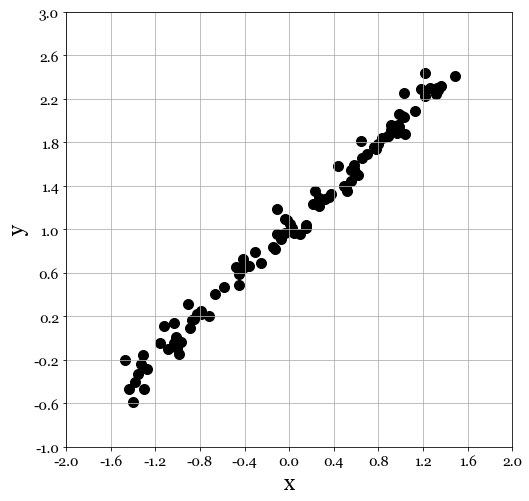

In [11]:
a1 = +1.0;
b1 = +1.0;
no_points = 100;
noiselevel = 0.1;
x1 = (np.random.random(no_points) - 0.5) * 3;
n1 = mnorm(0,1);
y1 = (a1*x1 + b1) + n1.rvs(no_points)*noiselevel;

plt.figure(figsize=(8,8))
plt.scatter(x1,y1,s=100,color='k')
plt.xticks(np.linspace(-2,2,11),labels=np.round(np.linspace(-2,2,11),2),fontsize=14,**csfont);
plt.yticks(np.linspace(-1,3,11),labels=np.round(np.linspace(-1,3,11),2),fontsize=14,**csfont);
plt.xlabel('x',fontsize=22,**csfont);
plt.ylabel('y',fontsize=22,**csfont);
plt.grid()
plt.savefig('../../assets/figures/014D/surface_1.png', dpi=300,bbox_inches="tight")

### Compute Loss Landscape for linear data

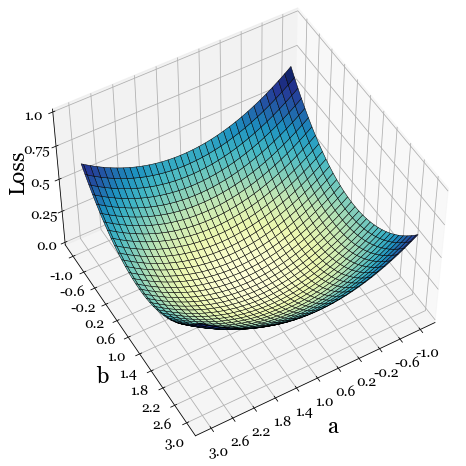

In [12]:
aval1 = np.linspace(-1,3,101)
bval1 = np.linspace(-1,3,101)
loss1 = np.zeros((101,101))
am1,bm1 = np.meshgrid(aval1,bval1)
for i in range(len(aval1)):
    for j in range(len(bval1)):
        a_current = am1[i,j]
        b_current = bm1[i,j]
        y_pred = a_current*x1 + b_current
        error = y_pred - y1
        loss1[i,j] = np.sum(error**2) / 1000

plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(am1,bm1,loss1,cmap='YlGnBu', edgecolor='black',linewidth=0.5)
ax.view_init(elev=50., azim=60)
ax.set_xticks(np.linspace(-1,3,11),labels=np.round(np.linspace(-1,3,11),2),fontsize=14,**csfont);
ax.set_yticks(np.linspace(-1,3,11),labels=np.round(np.linspace(-1,3,11),2),fontsize=14,**csfont);
ax.set_zticks(np.linspace(0,1,5),labels=np.linspace(0,1,5),fontsize=14,**csfont);
ax.set_xlabel('\na',fontsize=22,**csfont);
ax.set_ylabel('\nb',fontsize=22,**csfont);
ax.set_zlabel('Loss',rotation=90,fontsize=22,**csfont);
plt.savefig('../../assets/figures/014D/surface_2.png', dpi=300,bbox_inches="tight")

### Non-linear Dataset

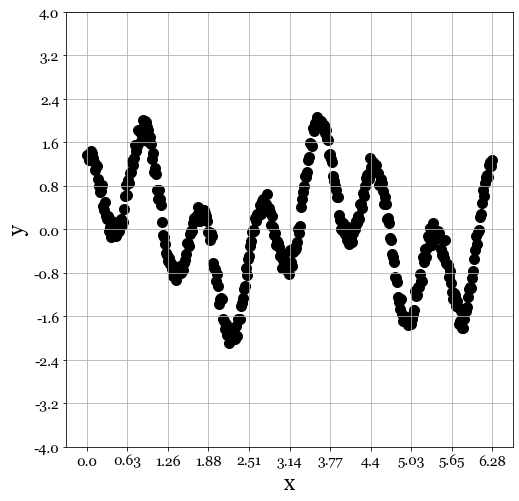

In [13]:
a2 = 2
b2 = 7
no_points = 400
noiselevel = 0.1
x2 = np.linspace(0,2*np.pi,no_points)
n1 = mnorm(0,1)
y2 = np.sin(0.333+x2*a2) + np.cos(x2*b2) + n1.rvs(no_points)*noiselevel;

plt.figure(figsize=(8,8))
plt.scatter(x2,y2,s=100,color='k')
plt.xticks(np.linspace(0,np.pi*2,11),labels=np.round(np.linspace(0,np.pi*2,11),2),fontsize=14,**csfont);
plt.yticks(np.linspace(-4,4,11),labels=np.round(np.linspace(-4,4,11),2),fontsize=14,**csfont);
plt.xlabel('x',fontsize=22,**csfont);
plt.ylabel('y',fontsize=22,**csfont);
plt.grid()
plt.savefig('../../assets/figures/014D/surface_3.png', dpi=300,bbox_inches="tight")

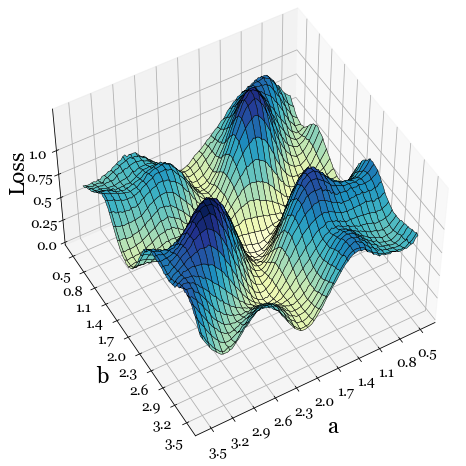

In [14]:
aval2 = np.linspace(0.5,3.5,101)
bval2 = np.linspace(0.5,3.5,101)
loss2 = np.zeros((101,101))
am2,bm2 = np.meshgrid(aval2,bval2)
for i in range(len(aval2)):
    for j in range(len(bval2)):
        a_current = am2[i,j]
        b_current = bm2[i,j]
        y_pred = np.sin(x2*a_current) + np.cos(x2*b_current) + n1.rvs(no_points)*noiselevel;
        error = y_pred - y2
        loss2[i,j] = np.sum(error**2) / 1000
        
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(am2,bm2,loss2,cmap='YlGnBu', edgecolor='black',linewidth=0.5)
ax.view_init(elev=50., azim=60)
ax.set_xticks(np.linspace(0.5,3.5,11),labels=np.round(np.linspace(0.5,3.5,11),2),fontsize=14,**csfont);
ax.set_yticks(np.linspace(0.5,3.5,11),labels=np.round(np.linspace(0.5,3.5,11),2),fontsize=14,**csfont);
ax.set_zticks(np.linspace(0,1,5),labels=np.linspace(0,1,5),fontsize=14,**csfont);
ax.set_xlabel('\na',fontsize=22,**csfont);
ax.set_ylabel('\nb',fontsize=22,**csfont);
ax.set_zlabel('Loss',rotation=90,fontsize=22,**csfont);
plt.savefig('../../assets/figures/014D/surface_4.png', dpi=300,bbox_inches="tight")